# 1. Import libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# combinations
from itertools import combinations

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Load data

In [2]:
dataset = pd.read_csv('../results/prepared_data.csv')

# set the column type for column with date
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%Y-%m-%d')

dataset

,Data,GŁOGÓW (151160060) Stan wody [cm],RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],BARDO ŚLĄSKIE (250160410) Suma opadów [mm],BIERUTÓW (251170270) Suma opadów [mm],BOLESŁAWÓW (250160610) Suma opadów [mm],BOLKÓW (250160030) Suma opadów [mm],BORÓW (250160070) Suma opadów [mm],BRZEG (250170050) Suma opadów [mm],BRZEG DOLNY (251160230) Suma opadów [mm],...,WALIM (250160270) Suma opadów [mm],WROCŁAW-STRACHOWICE (351160424) Suma opadów [mm],ZIELENIEC (250160530) Suma opadów [mm],ZIELINA (250170280) Suma opadów [mm],ŹRÓDŁA (251160370) Suma opadów [mm],średnia Suma opadów [mm],mediana Suma opadów [mm],std Suma opadów [mm],min Suma opadów [mm],max Suma opadów [mm]
0,2012-01-01,199.0,119.0,0.2,0.5,0.5,0.7,0.2,NaN,0.8,...,0.0,0.3,7.0,0.5,NaN,0.721875,0.5,1.011152,1.004099,0.997161
1,2012-01-02,197.0,116.0,NaN,1.1,1.0,0.8,0.0,0.3,0.6,...,0.1,0.2,1.3,NaN,NaN,0.888889,0.6,0.975195,0.967729,0.960422
2,2012-01-03,197.0,118.0,2.2,0.9,5.6,NaN,0.0,NaN,0.1,...,0.2,0.1,9.5,NaN,NaN,1.406667,0.2,2.389560,2.373573,2.357783
3,2012-01-04,204.0,127.0,2.4,0.1,12.5,NaN,NaN,0.6,0.5,...,5.2,0.0,12.6,0.9,NaN,3.620270,1.5,4.469327,4.440950,4.413037
4,2012-01-05,205.0,153.0,8.9,7.1,23.0,10.2,0.5,1.0,3.0,...,12.9,2.5,46.0,6.1,NaN,10.271795,7.1,9.973365,9.910877,9.849571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2021-12-27,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.000000,0.0,0.000000,0.000000,0.000000
3649,2021-12-28,NaN,NaN,2.4,0.0,2.8,1.2,5.7,3.1,2.8,...,0.2,3.5,6.7,4.5,3.8,2.206579,2.1,1.847490,1.836050,1.824848
3650,2021-12-29,NaN,NaN,0.2,2.3,0.0,0.5,0.7,1.0,0.5,...,0.0,1.3,3.2,1.1,0.9,0.562500,0.5,0.635832,0.631579,0.627404
3651,2021-12-30,NaN,NaN,1.6,6.2,2.0,3.4,4.4,5.5,4.7,...,1.5,4.6,10.2,5.6,4.2,4.215789,4.2,2.810743,2.797137,2.783785


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 94 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Data                                                 3653 non-null   datetime64[ns]
 1   GŁOGÓW (151160060) Stan wody [cm]                    3592 non-null   float64       
 2   RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm]         3592 non-null   float64       
 3   BARDO ŚLĄSKIE (250160410) Suma opadów [mm]           2069 non-null   float64       
 4   BIERUTÓW (251170270) Suma opadów [mm]                1847 non-null   float64       
 5   BOLESŁAWÓW (250160610) Suma opadów [mm]              2684 non-null   float64       
 6   BOLKÓW (250160030) Suma opadów [mm]                  1983 non-null   float64       
 7   BORÓW (250160070) Suma opadów [mm]                   2048 non-null   float64       
 8 

In [4]:
hierarchy = pd.read_csv('../results/prepared_hierarchy.csv')

hierarchy

,id_meteo,name_meteo,id_hydro,name_hydro
0,251160080,GŁOGÓW,151160060,GŁOGÓW
1,350180540,RACIBÓRZ,150180060,RACIBÓRZ-MIEDONIA


In [5]:
water_level_suffix = 'Stan wody [cm]'
rains_suffix = 'Suma opadów [mm]'

# 3. EDA

In [6]:
def create_col_name(station_id, station_name, suffix):
    name = f'{station_name} ({station_id}) {suffix}'
    return name

River level over time for different stations.

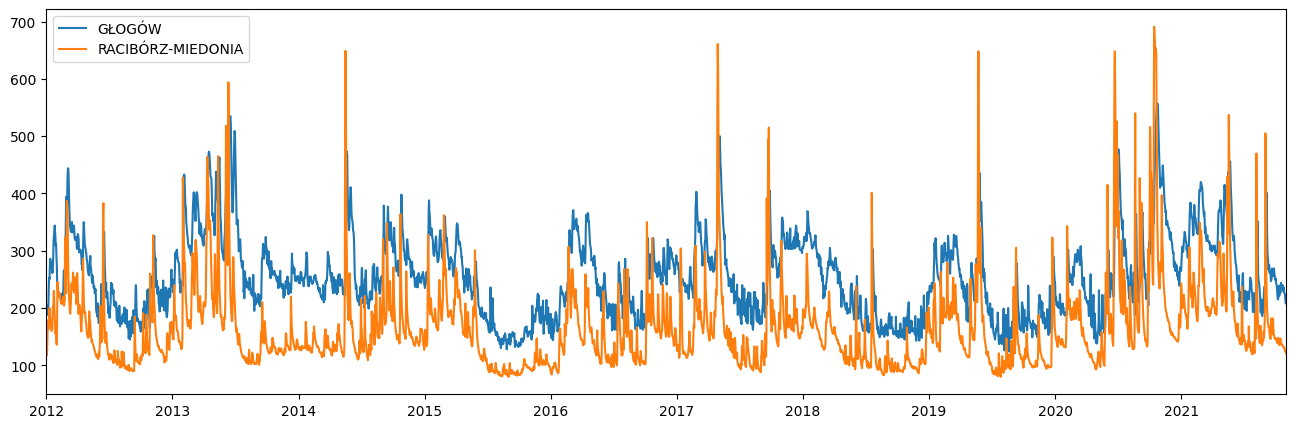

In [7]:
plt.figure(figsize=(16, 5))

for i, (_, stations) in enumerate(hierarchy.iterrows()):
    if i <= 14:
        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        plt.plot(dataset['Data'], dataset[water_level_col], label=stations["name_hydro"])

# decorations
plt.xlim([dataset['Data'].min(), dataset.loc[~dataset[water_level_col].isnull(), 'Data'].max()])
plt.legend(loc='upper left', prop={'size': 10})
plt.show()

River level over time for different stations for selected tu=ime

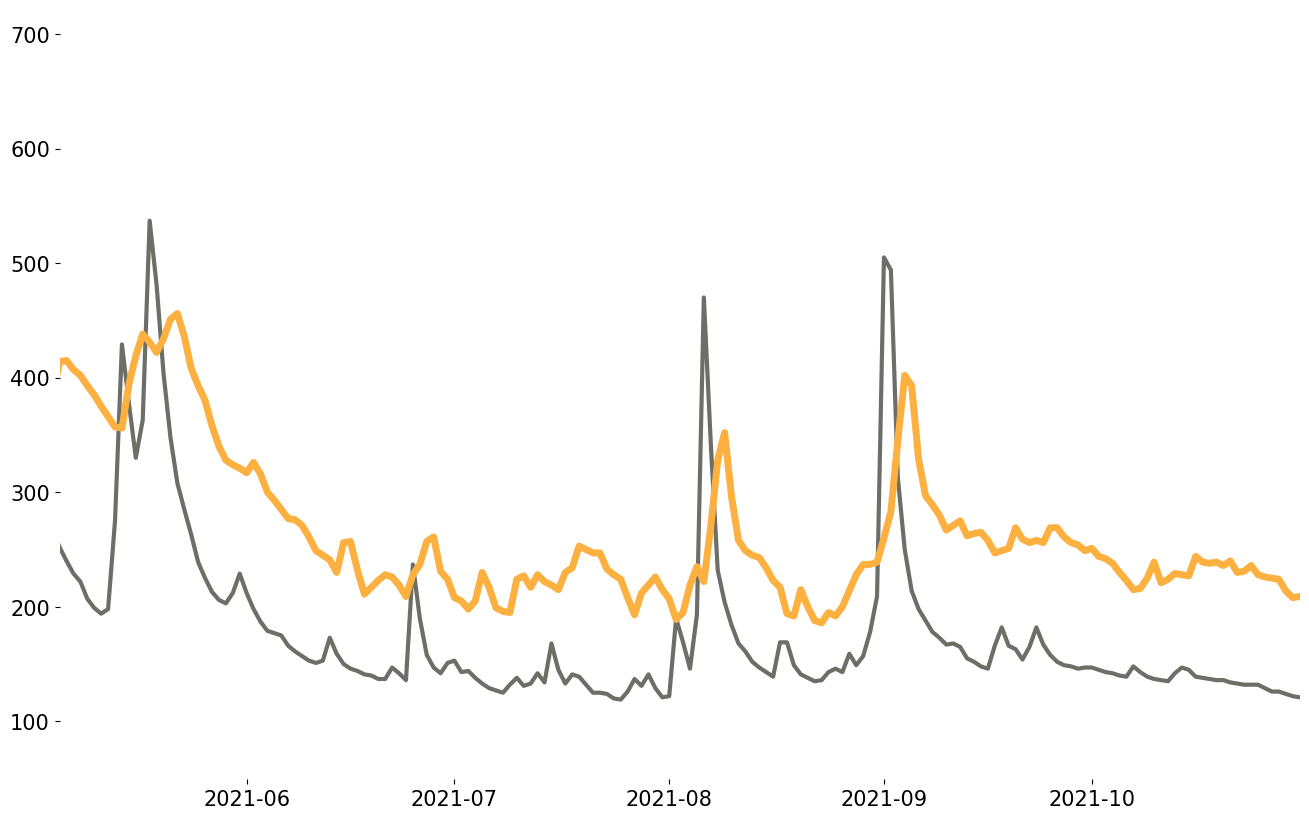

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

ax.plot(dataset['Data'], dataset['RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm]'], color='#6c6e67', linewidth=3)
ax.plot(dataset['Data'], dataset['GŁOGÓW (151160060) Stan wody [cm]'], color='#fcb040', linewidth=5)

# decorations
ax.set_xlim([dataset.loc[~dataset['GŁOGÓW (151160060) Stan wody [cm]'].isnull(), 'Data'].iloc[-180], 
             dataset.loc[~dataset['GŁOGÓW (151160060) Stan wody [cm]'].isnull(), 'Data'].max()])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)


plt.savefig('../results/glogow-raciborz-comparision.png', format='png', dpi=600, transparent=True)
plt.show()

River level over time for different stations. ~ Normalized by MinMaxScaler

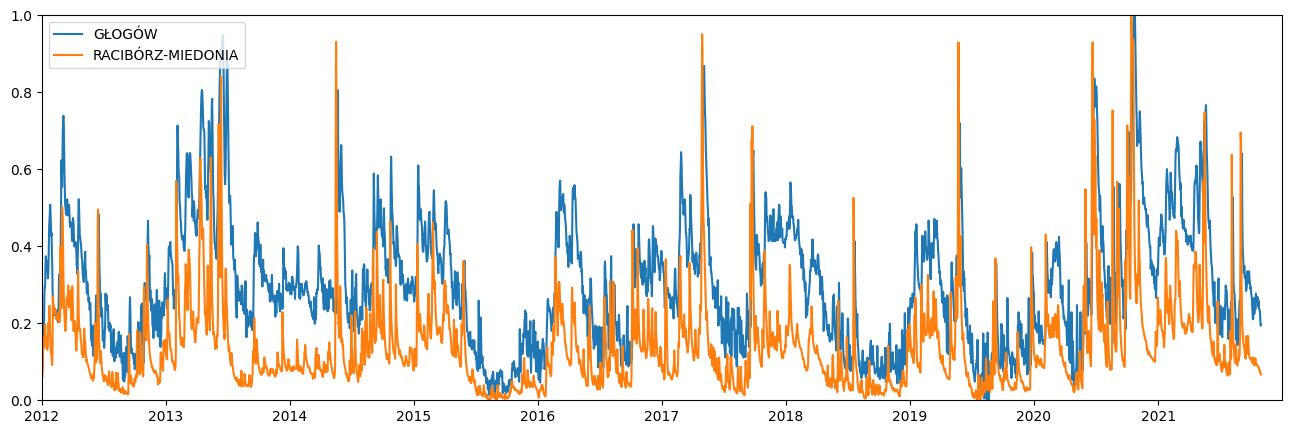

In [9]:
plt.figure(figsize=(16, 5))

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    plt.plot(dataset['Data'], 
             (dataset[water_level_col] - dataset[water_level_col].min())/\
             (dataset[water_level_col].max() - dataset[water_level_col].min()), 
             label=stations["name_hydro"])

    
# decorations
plt.ylim([0, 1])
plt.xlim([dataset['Data'].min(), dataset['Data'].max()])
plt.legend(loc='upper left', prop={'size': 10})
plt.show()

River level over time with sum of rain for this station.

GŁOGÓW (251160080) Suma opadów [mm]


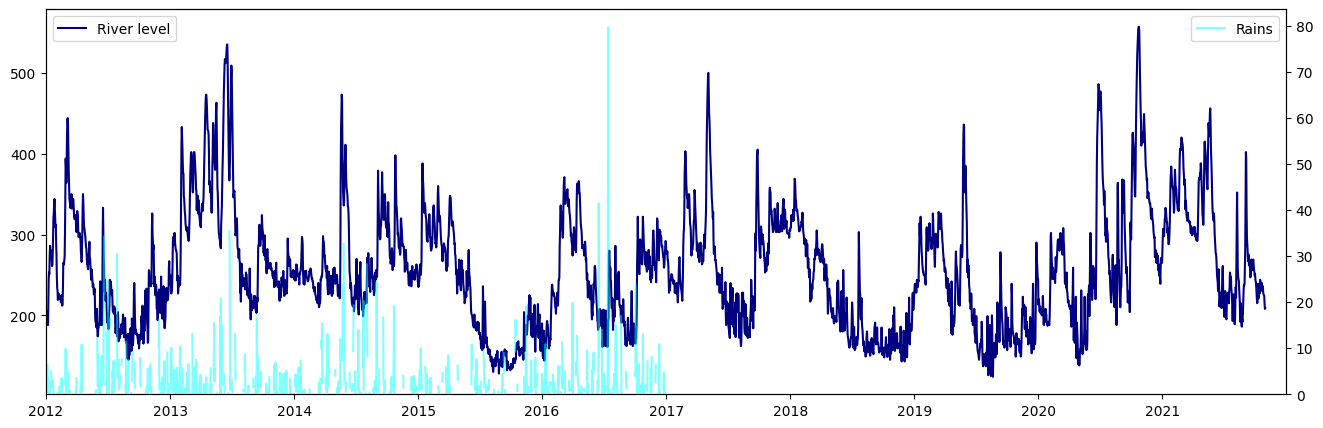

RACIBÓRZ (350180540) Suma opadów [mm]


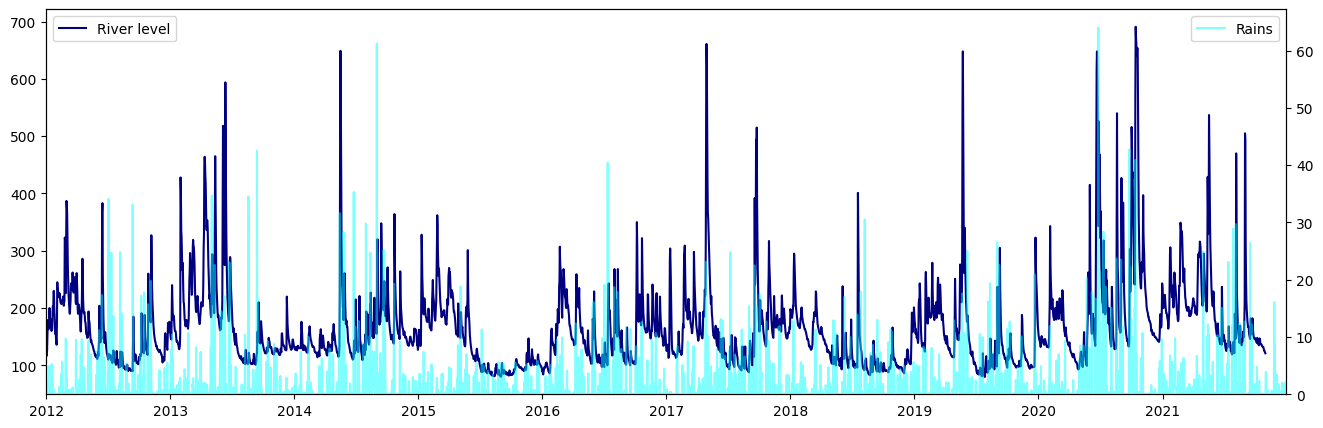

In [10]:
for i, (_, stations) in enumerate(hierarchy.iterrows()):
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 5))
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)
    print(rain_col)

    ax.plot(dataset['Data'], dataset[water_level_col], label='River level', color='navy')

    ax2 = ax.twinx()
    ax2.plot(dataset['Data'], dataset[rain_col], label='Rains', color='aqua', linewidth=1.5, alpha=0.5)


    # decorations
    ax.set_xlim([dataset.loc[~(pd.isnull(dataset[rain_col])), 'Data'].min(), dataset['Data'].max()])
    ax.legend(loc='upper left')

    ax2.legend(loc='upper right')
    ax2.set_ylim([0, dataset[rain_col].max()*1.05])

    plt.show()

How the river level changes in the following years.

In [11]:
dataset_years_monthly = dataset.copy()
dataset_years_monthly['Rok'] = dataset_years_monthly['Data'].dt.year
dataset_years_monthly['Miesiąc'] = [d.strftime('%b') for d in dataset_years_monthly['Data']]

dataset_years_monthly = dataset_years_monthly.drop(['Data'] + list(dataset_years_monthly.filter(regex=('Brak pomiaru')).columns),
                                                   axis=1)
dataset_years_monthly = dataset_years_monthly.groupby(['Rok', 'Miesiąc']).mean()
dataset_years_monthly.reset_index(inplace=True)


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dataset_years_monthly['Miesiąc'] = pd.Categorical(dataset_years_monthly['Miesiąc'], categories=months, ordered=True)
dataset_years_monthly.sort_values(by=['Rok', 'Miesiąc'], inplace=True)
dataset_years_monthly.reset_index(drop=True, inplace=True)

dataset_years_monthly.head(3)

,Rok,Miesiąc,GŁOGÓW (151160060) Stan wody [cm],RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],BARDO ŚLĄSKIE (250160410) Suma opadów [mm],BIERUTÓW (251170270) Suma opadów [mm],BOLESŁAWÓW (250160610) Suma opadów [mm],BOLKÓW (250160030) Suma opadów [mm],BORÓW (250160070) Suma opadów [mm],BRZEG (250170050) Suma opadów [mm],...,WALIM (250160270) Suma opadów [mm],WROCŁAW-STRACHOWICE (351160424) Suma opadów [mm],ZIELENIEC (250160530) Suma opadów [mm],ZIELINA (250170280) Suma opadów [mm],ŹRÓDŁA (251160370) Suma opadów [mm],średnia Suma opadów [mm],mediana Suma opadów [mm],std Suma opadów [mm],min Suma opadów [mm],max Suma opadów [mm]
0,2012,Jan,266.967742,170.290323,1.940000,2.607692,3.041935,2.834483,1.473333,2.508333,...,2.987097,1.558065,6.458065,1.900000,NaN,2.407410,1.864516,2.056398,2.046527,2.036736
1,2012,Feb,251.827586,225.689655,1.203571,2.213636,2.017241,2.348276,1.385714,2.057143,...,2.444828,1.282759,3.031034,0.925926,NaN,1.640113,1.365517,1.275498,1.269690,1.263946
2,2012,Mar,352.193548,248.870968,1.572727,1.670000,1.287097,2.109091,1.445455,1.740000,...,2.375000,0.370968,1.090323,2.310000,NaN,0.726044,0.590323,0.595791,0.593147,0.590518


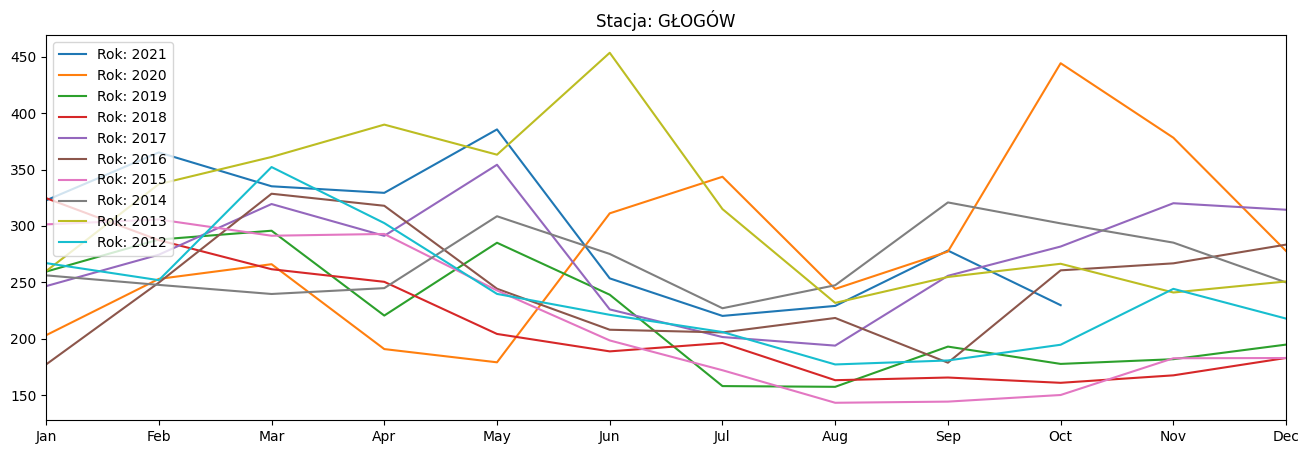

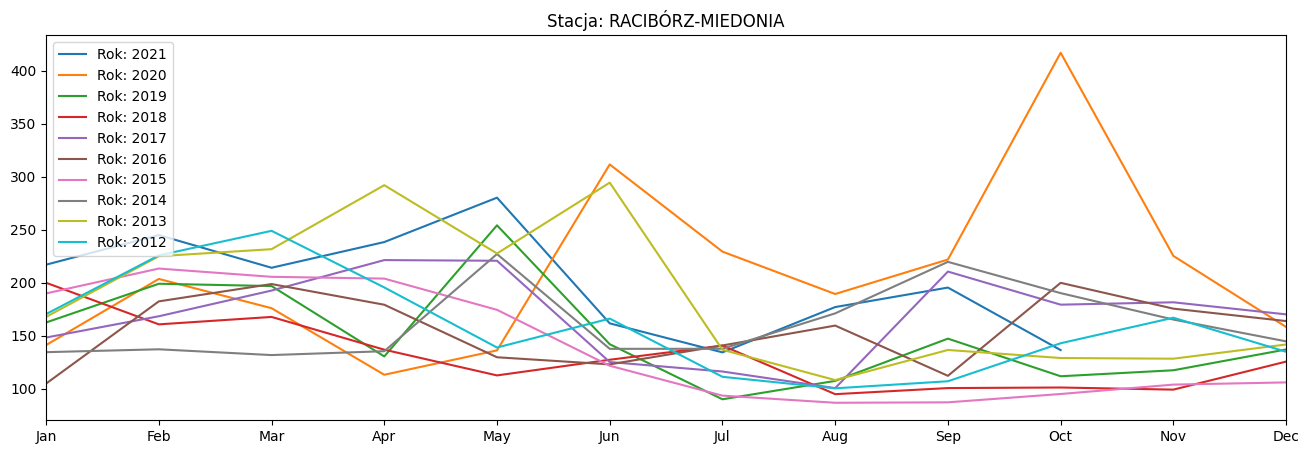

In [12]:
for i, (_, stations) in enumerate(hierarchy.iterrows()):
    if i < 3:
        plt.figure(figsize=(16, 5))

        water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
        for year in dataset_years_monthly['Rok'].unique()[::-1]:
            water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
            plt.plot(dataset_years_monthly.loc[dataset_years_monthly['Rok']==year, 'Miesiąc'], 
                     dataset_years_monthly.loc[dataset_years_monthly['Rok']==year, water_level_col], label=f'Rok: {year}')

        # decorations
        plt.title(f'Stacja: {stations["name_hydro"]}')
        plt.xlim(['Jan', 'Dec'])
        plt.legend(loc='upper left')
        plt.show()

Effect of average rain on average normalized river level

In [13]:
dataset_years_monthly_normalized = dataset_years_monthly.copy()

# Level of water
for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    dataset_years_monthly_normalized[water_level_col] = \
        (dataset_years_monthly_normalized[water_level_col] - dataset_years_monthly_normalized[water_level_col].min())/\
        (dataset_years_monthly_normalized[water_level_col].max() - dataset_years_monthly_normalized[water_level_col].min())
    
# Rain
rain_cols = dataset_years_monthly_normalized.filter(regex=("Suma opadów")).columns
dataset_years_monthly_normalized[rain_cols] = \
        (dataset_years_monthly_normalized[rain_cols] - dataset_years_monthly_normalized[rain_cols].min().min())/\
        (dataset_years_monthly_normalized[rain_cols].max().max() - dataset_years_monthly_normalized[rain_cols].min().min())

dataset_years_monthly_normalized.tail(3)

,Rok,Miesiąc,GŁOGÓW (151160060) Stan wody [cm],RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],BARDO ŚLĄSKIE (250160410) Suma opadów [mm],BIERUTÓW (251170270) Suma opadów [mm],BOLESŁAWÓW (250160610) Suma opadów [mm],BOLKÓW (250160030) Suma opadów [mm],BORÓW (250160070) Suma opadów [mm],BRZEG (250170050) Suma opadów [mm],...,WALIM (250160270) Suma opadów [mm],WROCŁAW-STRACHOWICE (351160424) Suma opadów [mm],ZIELENIEC (250160530) Suma opadów [mm],ZIELINA (250170280) Suma opadów [mm],ŹRÓDŁA (251160370) Suma opadów [mm],średnia Suma opadów [mm],mediana Suma opadów [mm],std Suma opadów [mm],min Suma opadów [mm],max Suma opadów [mm]
117,2021,Oct,0.278841,0.150557,0.059651,0.091335,0.114584,0.121801,0.035209,0.090365,...,0.113967,0.012270,0.145274,0.064177,0.040414,0.033409,0.026279,0.028860,0.028659,0.028461
118,2021,Nov,NaN,NaN,0.088167,0.095359,0.136241,0.103406,0.085737,0.086130,...,0.170546,0.040188,0.163855,0.109290,0.092364,0.061789,0.049391,0.049756,0.049501,0.049246
119,2021,Dec,NaN,NaN,0.043809,0.084365,0.067496,0.068355,0.063133,0.084115,...,0.054705,0.045999,0.144994,0.063000,0.072541,0.057660,0.046869,0.047544,0.047292,0.047043


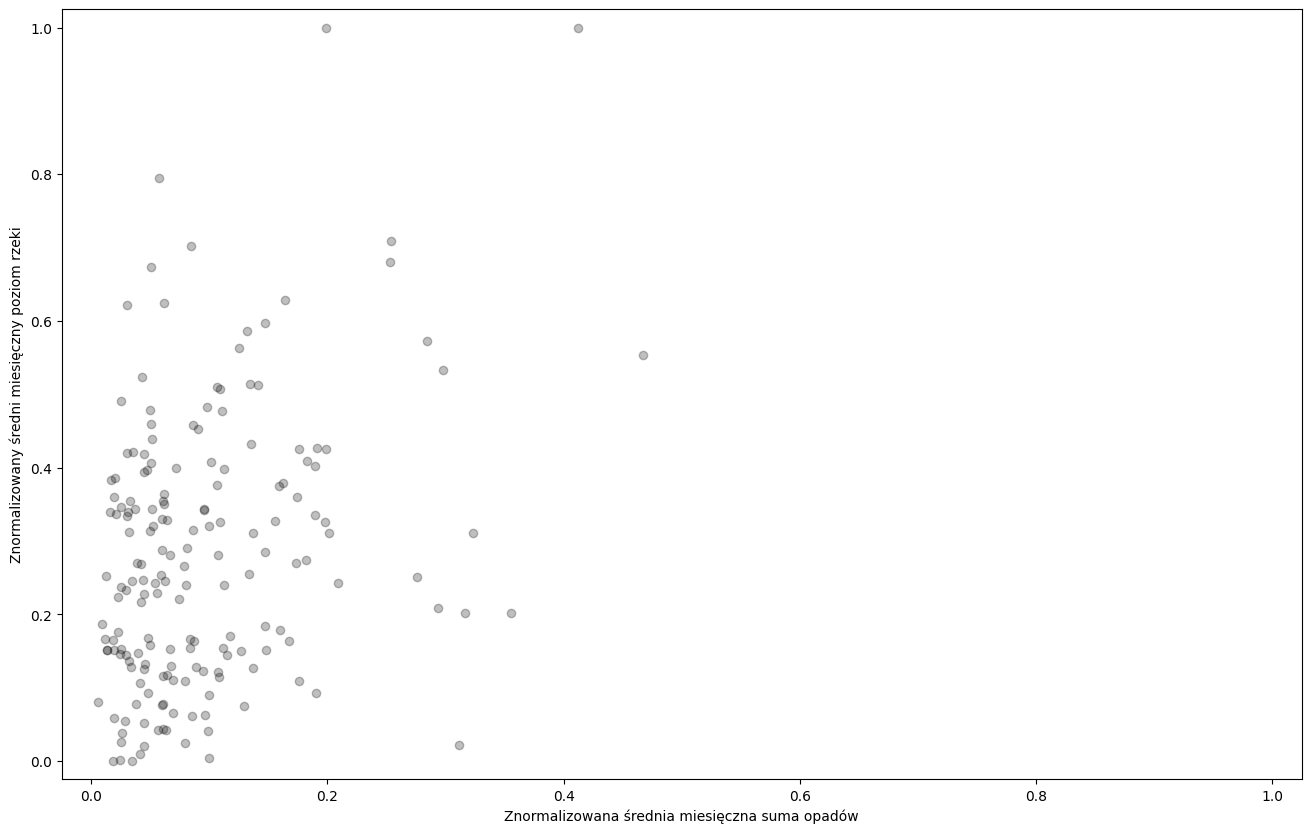

In [14]:
plt.figure(figsize=(16, 10))

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)

    plt.scatter(dataset_years_monthly_normalized[rain_col], dataset_years_monthly_normalized[water_level_col],
                label=f'Stacja meteo: {stations["name_meteo"]}, Stacja hydro: {stations["name_hydro"]}',
                color='black', alpha=0.25)

    
# decorations
plt.ylim([-0.025, 1.025])
plt.xlim([-0.025, 1.025])
plt.xlabel('Znormalizowana średnia miesięczna suma opadów')
plt.ylabel('Znormalizowany średni miesięczny poziom rzeki')
plt.show()

Sezonowość / Trend

In [15]:
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized.copy()
dataset_years_monthly_normalized_combined.set_index(['Rok', 'Miesiąc'], inplace=True)
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized_combined[
                                                        dataset_years_monthly_normalized.filter(regex=("Stan wody")).columns]
dataset_years_monthly_normalized_combined = dataset_years_monthly_normalized_combined.stack().to_frame()
dataset_years_monthly_normalized_combined.rename({0: 'Średni stan wody'}, axis=1, inplace=True)
dataset_years_monthly_normalized_combined.reset_index(inplace=True)

dataset_years_monthly_normalized_combined

,Rok,Miesiąc,level_2,Średni stan wody
0,2012,Jan,GŁOGÓW (151160060) Stan wody [cm],0.399041
1,2012,Jan,RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],0.253466
2,2012,Feb,GŁOGÓW (151160060) Stan wody [cm],0.350281
3,2012,Feb,RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],0.421146
4,2012,Mar,GŁOGÓW (151160060) Stan wody [cm],0.673519
...,...,...,...,...
231,2021,Aug,RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],0.273482
232,2021,Sep,GŁOGÓW (151160060) Stan wody [cm],0.434894
233,2021,Sep,RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],0.329164
234,2021,Oct,GŁOGÓW (151160060) Stan wody [cm],0.278841


GŁOGÓW (151160060) Stan wody [cm]


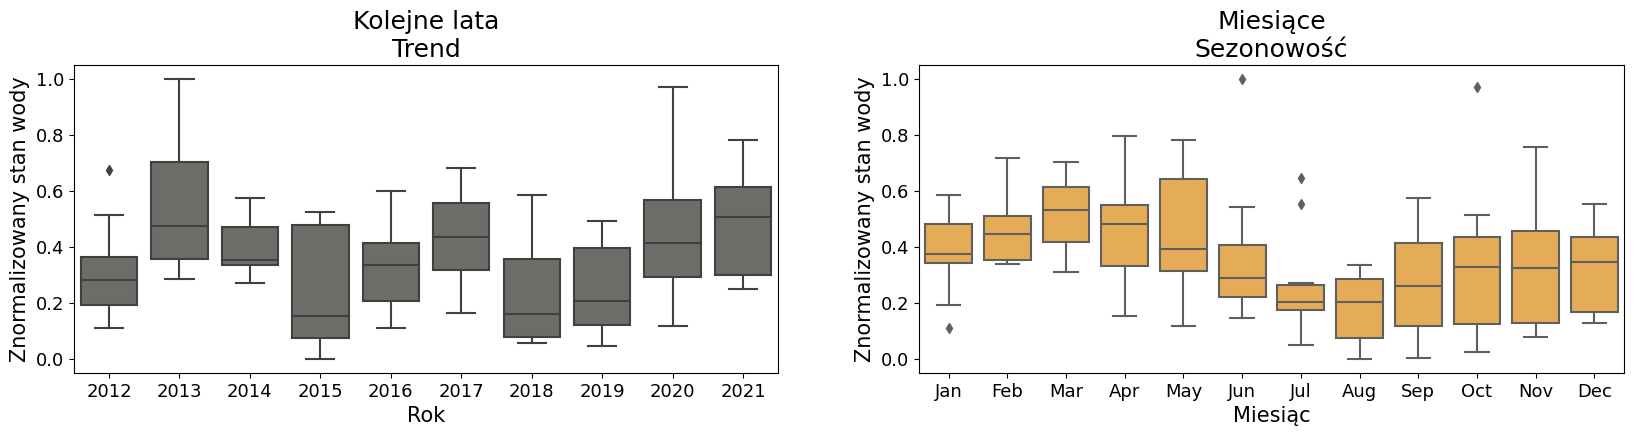

RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm]


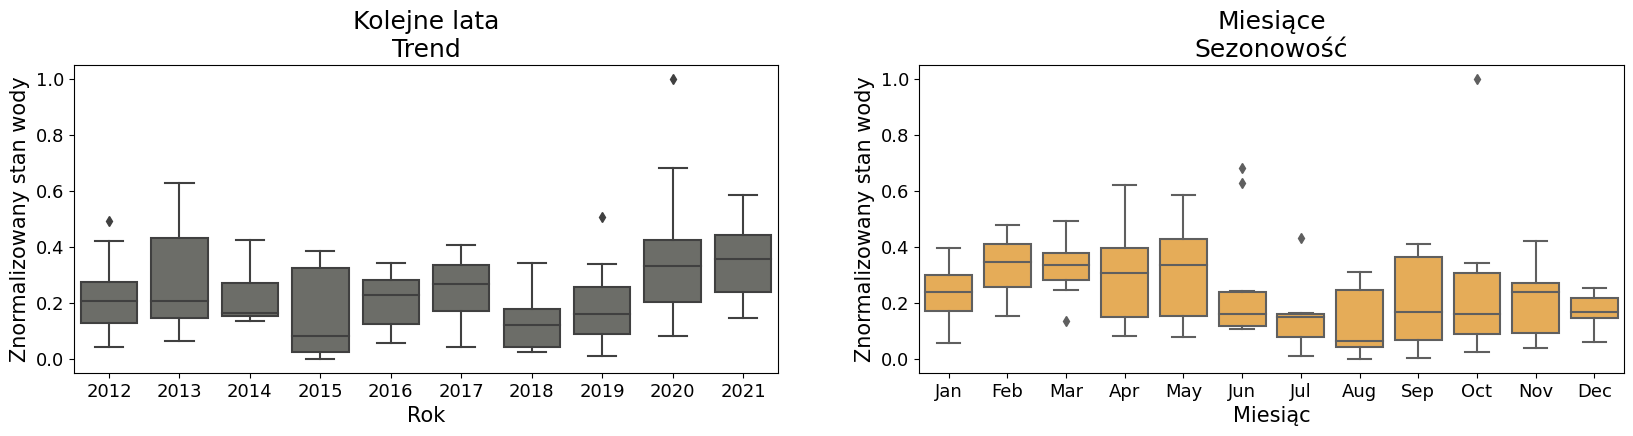

In [16]:
for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    print(water_level_col)

    fig, axes = plt.subplots(1, 2, figsize=(20, 4))

    sns.boxplot(x='Rok', y='Średni stan wody', 
                data=dataset_years_monthly_normalized_combined[
                    dataset_years_monthly_normalized_combined['level_2']==water_level_col], 
                ax=axes[0], color='#6c6e67')
    axes[0].set_title('Kolejne lata\nTrend', size=18)
    axes[0].set_xlabel('Rok', fontsize=15)
    axes[0].set_ylabel('Znormalizowany stan wody', fontsize=15)
    axes[0].xaxis.set_tick_params(labelsize=13)
    axes[0].yaxis.set_tick_params(labelsize=13)
    

    sns.boxplot(x='Miesiąc', y='Średni stan wody',
                data=dataset_years_monthly_normalized_combined[
                    dataset_years_monthly_normalized_combined['level_2']==water_level_col], 
                ax=axes[1], color='#fcb040')
    axes[1].set_title('Miesiące\nSezonowość', size=18)
    axes[1].set_xlabel('Miesiąc', fontsize=15)
    axes[1].set_ylabel('Znormalizowany stan wody', fontsize=15)
    axes[1].xaxis.set_tick_params(labelsize=13)
    axes[1].yaxis.set_tick_params(labelsize=13)
    
    plt.savefig(f'../results/{stations["name_hydro"]}-boxplots.png', format='png', dpi=600, transparent=True,
                bbox_inches = "tight")
    
    plt.show()

#### Cross-correlation ~ river levels at different stations

In [17]:
dataset_normalized = dataset.copy()

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    rain_col = create_col_name(stations["id_meteo"], stations["name_meteo"], rains_suffix)
    
    # Level of water
    dataset_normalized[water_level_col] = \
        (dataset_normalized[water_level_col] - dataset_normalized[water_level_col].min())/\
        (dataset_normalized[water_level_col].max() - dataset_normalized[water_level_col].min())
    if stations['id_meteo']!=0:
        # Rain
        dataset_normalized[rain_col] = \
            (dataset_normalized[rain_col] - dataset_normalized[rain_col].min())/\
            (dataset_normalized[rain_col].max() - dataset_normalized[rain_col].min())

dataset_normalized

,Data,GŁOGÓW (151160060) Stan wody [cm],RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],BARDO ŚLĄSKIE (250160410) Suma opadów [mm],BIERUTÓW (251170270) Suma opadów [mm],BOLESŁAWÓW (250160610) Suma opadów [mm],BOLKÓW (250160030) Suma opadów [mm],BORÓW (250160070) Suma opadów [mm],BRZEG (250170050) Suma opadów [mm],BRZEG DOLNY (251160230) Suma opadów [mm],...,WALIM (250160270) Suma opadów [mm],WROCŁAW-STRACHOWICE (351160424) Suma opadów [mm],ZIELENIEC (250160530) Suma opadów [mm],ZIELINA (250170280) Suma opadów [mm],ŹRÓDŁA (251160370) Suma opadów [mm],średnia Suma opadów [mm],mediana Suma opadów [mm],std Suma opadów [mm],min Suma opadów [mm],max Suma opadów [mm]
0,2012-01-01,0.173210,0.063830,0.2,0.5,0.5,0.7,0.2,NaN,0.8,...,0.0,0.3,7.0,0.5,NaN,0.721875,0.5,1.011152,1.004099,0.997161
1,2012-01-02,0.168591,0.058920,NaN,1.1,1.0,0.8,0.0,0.3,0.6,...,0.1,0.2,1.3,NaN,NaN,0.888889,0.6,0.975195,0.967729,0.960422
2,2012-01-03,0.168591,0.062193,2.2,0.9,5.6,NaN,0.0,NaN,0.1,...,0.2,0.1,9.5,NaN,NaN,1.406667,0.2,2.389560,2.373573,2.357783
3,2012-01-04,0.184758,0.076923,2.4,0.1,12.5,NaN,NaN,0.6,0.5,...,5.2,0.0,12.6,0.9,NaN,3.620270,1.5,4.469327,4.440950,4.413037
4,2012-01-05,0.187067,0.119476,8.9,7.1,23.0,10.2,0.5,1.0,3.0,...,12.9,2.5,46.0,6.1,NaN,10.271795,7.1,9.973365,9.910877,9.849571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2021-12-27,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.000000,0.0,0.000000,0.000000,0.000000
3649,2021-12-28,NaN,NaN,2.4,0.0,2.8,1.2,5.7,3.1,2.8,...,0.2,3.5,6.7,4.5,3.8,2.206579,2.1,1.847490,1.836050,1.824848
3650,2021-12-29,NaN,NaN,0.2,2.3,0.0,0.5,0.7,1.0,0.5,...,0.0,1.3,3.2,1.1,0.9,0.562500,0.5,0.635832,0.631579,0.627404
3651,2021-12-30,NaN,NaN,1.6,6.2,2.0,3.4,4.4,5.5,4.7,...,1.5,4.6,10.2,5.6,4.2,4.215789,4.2,2.810743,2.797137,2.783785


Pearson correlation

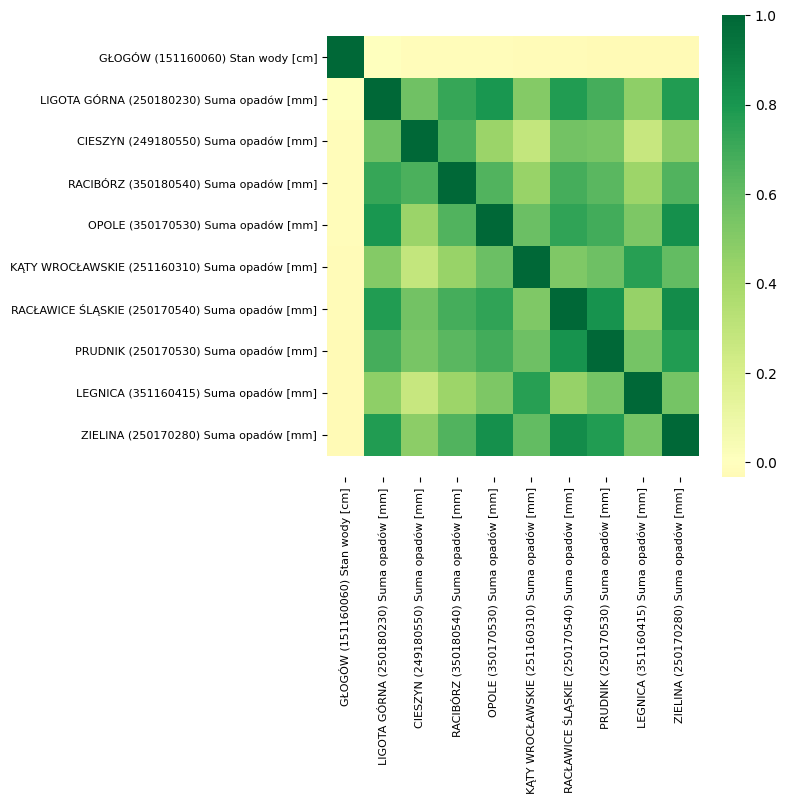

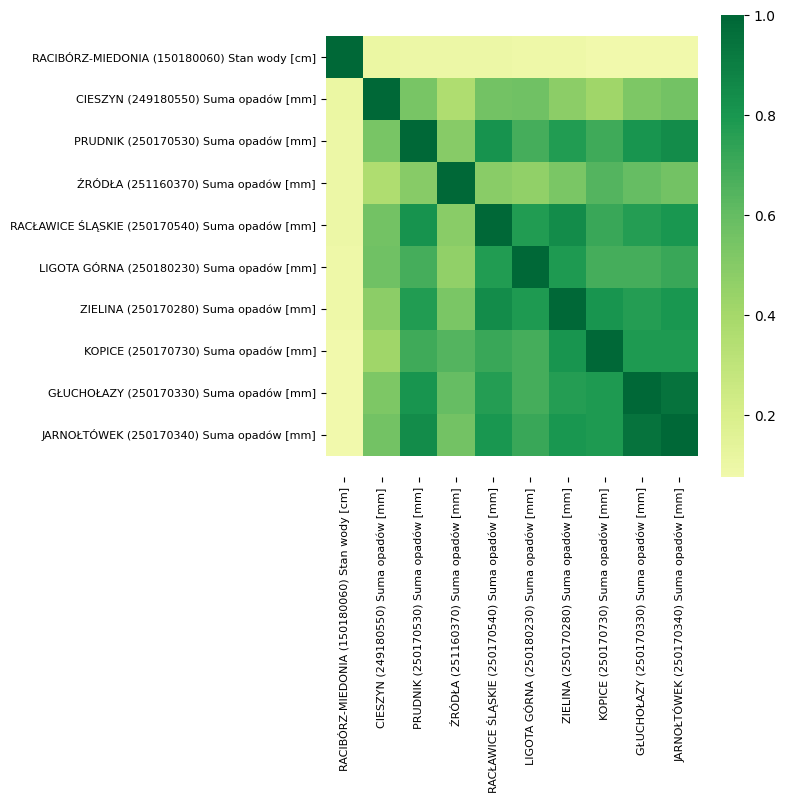

In [18]:
to_show = 10

for _, stations in hierarchy.iterrows():
    water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    cols_selected = [water_level_col] + list(dataset_normalized.filter(regex=('Suma opadów')).columns)

    # Plot
    plt.figure(figsize=(6, 6))
    corr_df = dataset_normalized[cols_selected].corr()
    corr_cols = corr_df.loc[water_level_col, :].copy()
    corr_cols = corr_cols.sort_values(ascending=False)[:to_show].index.to_list()
    corr_df = corr_df.loc[corr_cols, corr_cols]
    ax = sns.heatmap(corr_df, 
                     xticklabels=corr_cols, 
                     yticklabels=corr_cols, 
                     cmap='RdYlGn', 
                     center=0)

    # Decorations
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

Time Lagged Cross Correlation

In [19]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [20]:
dataset_normalized.head(3)

,Data,GŁOGÓW (151160060) Stan wody [cm],RACIBÓRZ-MIEDONIA (150180060) Stan wody [cm],BARDO ŚLĄSKIE (250160410) Suma opadów [mm],BIERUTÓW (251170270) Suma opadów [mm],BOLESŁAWÓW (250160610) Suma opadów [mm],BOLKÓW (250160030) Suma opadów [mm],BORÓW (250160070) Suma opadów [mm],BRZEG (250170050) Suma opadów [mm],BRZEG DOLNY (251160230) Suma opadów [mm],...,WALIM (250160270) Suma opadów [mm],WROCŁAW-STRACHOWICE (351160424) Suma opadów [mm],ZIELENIEC (250160530) Suma opadów [mm],ZIELINA (250170280) Suma opadów [mm],ŹRÓDŁA (251160370) Suma opadów [mm],średnia Suma opadów [mm],mediana Suma opadów [mm],std Suma opadów [mm],min Suma opadów [mm],max Suma opadów [mm]
0,2012-01-01,0.173210,0.063830,0.2,0.5,0.5,0.7,0.2,NaN,0.8,...,0.0,0.3,7.0,0.5,NaN,0.721875,0.5,1.011152,1.004099,0.997161
1,2012-01-02,0.168591,0.058920,NaN,1.1,1.0,0.8,0.0,0.3,0.6,...,0.1,0.2,1.3,NaN,NaN,0.888889,0.6,0.975195,0.967729,0.960422
2,2012-01-03,0.168591,0.062193,2.2,0.9,5.6,NaN,0.0,NaN,0.1,...,0.2,0.1,9.5,NaN,NaN,1.406667,0.2,2.389560,2.373573,2.357783


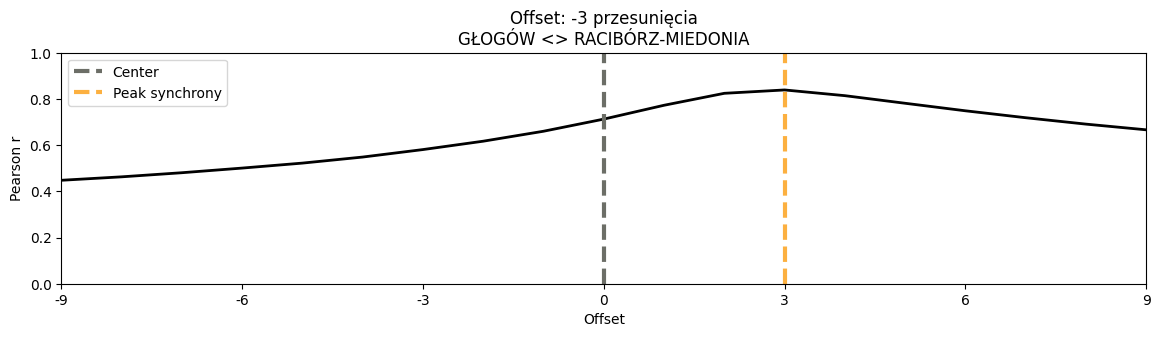

In [21]:
time_lagged_cross_correlation_to_show = 3

time_lagged_cross_correlation = pd.DataFrame({'pierwsza_stacja': [], 'druga_stacja': [], 'lag': [], 
                                              'corr': [], 'arg_corr': [], 'max_corr': []})

hydro_stations = list(hierarchy.index)

for i, (first_station, second_station) in enumerate(combinations(hydro_stations, 2)):
        first_water_level_col = create_col_name(hierarchy.loc[first_station, "id_hydro"], 
                                                hierarchy.loc[first_station, "name_hydro"],
                                                water_level_suffix)
        first_station_name = hierarchy.loc[first_station, "name_hydro"]
        second_water_level_col = create_col_name(hierarchy.loc[second_station, "id_hydro"], 
                                                 hierarchy.loc[second_station, "name_hydro"],
                                                 water_level_suffix)
        second_station_name = hierarchy.loc[second_station, "name_hydro"]
        if first_station_name == 'GŁOGÓW':
            d1 = dataset_normalized[first_water_level_col].copy()
            d2 = dataset_normalized[second_water_level_col].copy()
            rs = [crosscorr(d1, d2, lag) for lag in range(-int(9),int(9+1))]
            offset = int(np.floor(len(rs)/2)-np.argmax(rs))
            # Attaching data to a DataFrame
            d1_d2_station = pd.DataFrame()
            d1_d2_station['lag'] = range(-int(9),int(9+1))
            d1_d2_station['pierwsza_stacja'] = first_station_name
            d1_d2_station['druga_stacja'] = second_station_name
            d1_d2_station['corr'] = rs
            d1_d2_station['arg_corr'] = offset
            d1_d2_station['max_corr'] = np.max(rs)
            time_lagged_cross_correlation = pd.concat([time_lagged_cross_correlation, d1_d2_station], axis=0)
            if i < time_lagged_cross_correlation_to_show:
                fig, ax=plt.subplots(figsize=(14,3))
                ax.plot(rs, color='black', linewidth=2)
                ax.axvline(np.floor(len(rs)/2), color='#6c6e67',linestyle='--', label='Center', linewidth=3)
                ax.axvline(np.argmax(rs), color='#fcb040',linestyle='--', label='Peak synchrony', linewidth=3)
                ax.set(title=f'Offset: {offset} przesunięcia\n{first_station_name} <> {second_station_name}',
                       xlabel='Offset',ylabel='Pearson r')
                ax.set_xticks([0, 3, 6, 9, 12, 15, 18])
                ax.set_xlim([0, 18])
                ax.set_ylim([0, 1])
                ax.set_xticklabels([-9, -6, -3, 0, 3, 6, 9])
                plt.legend(loc='upper left')
                plt.savefig(f'../results/TLCC-{first_station_name}-{second_station_name}.png', format='png', dpi=600,
                            transparent=True,
                            bbox_inches = "tight")
                
                plt.show()

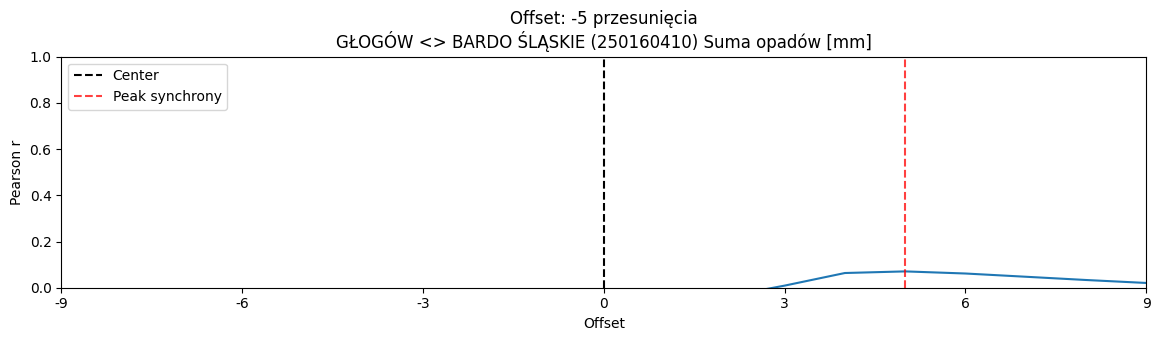

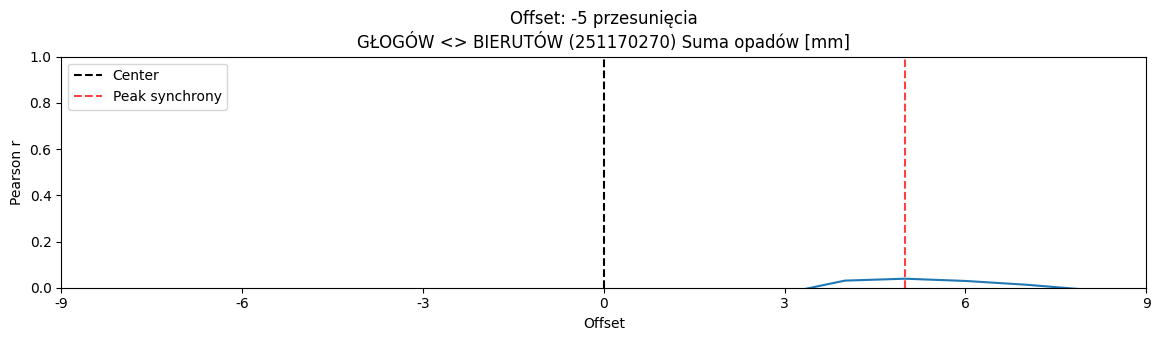

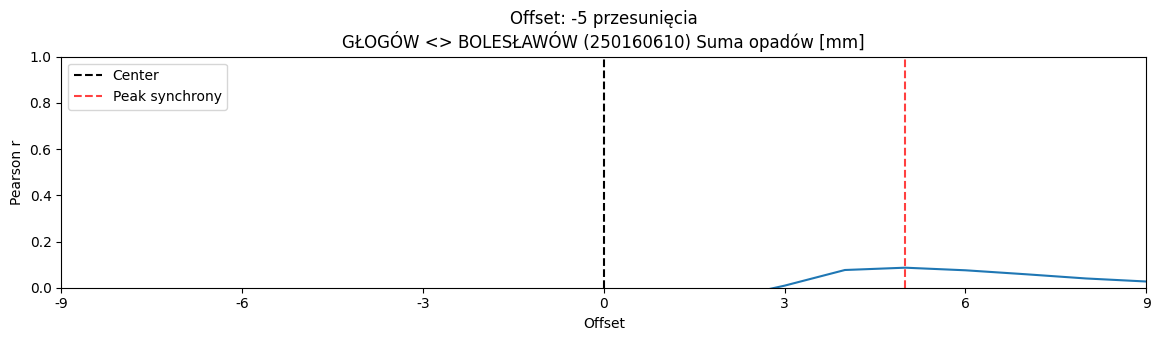

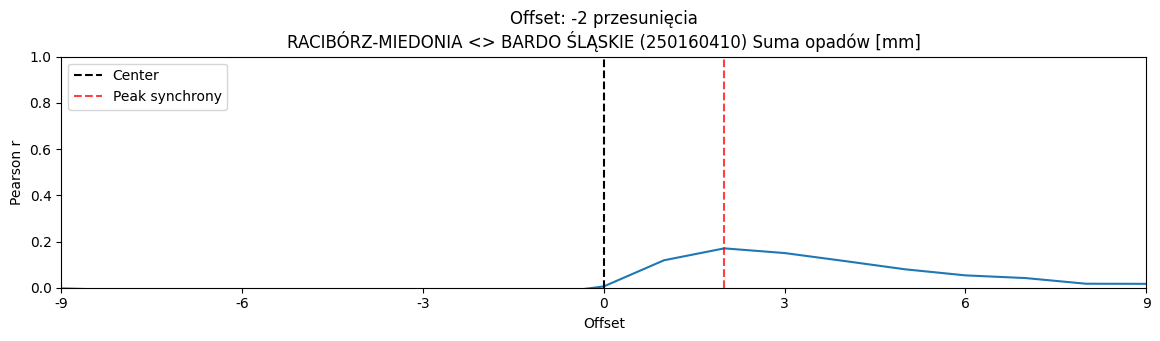

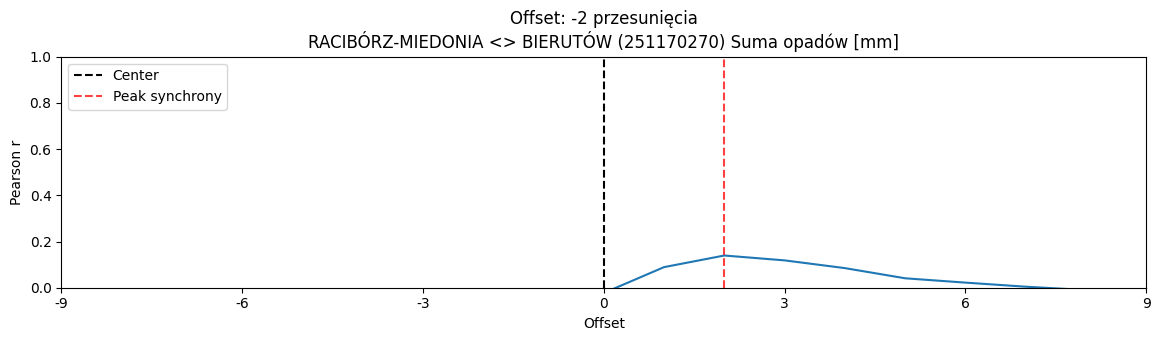

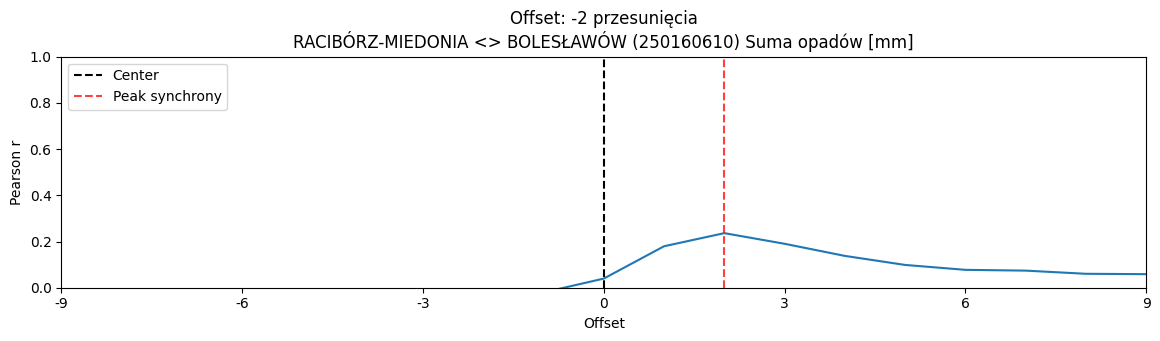

In [22]:
time_lagged_cross_correlation_to_show = 3

time_lagged_cross_correlation = pd.DataFrame({'pierwsza_stacja': [], 'druga_stacja': [], 'lag': [], 
                                              'corr': [], 'arg_corr': [], 'max_corr': []})

hydro_stations = list(hierarchy.index)

for _, stations in hierarchy.iterrows():
    first_water_level_col = create_col_name(stations["id_hydro"], stations["name_hydro"], water_level_suffix)
    first_station_name = stations["name_hydro"]
    
    for i, second_rain_level_col in enumerate(list(dataset_normalized.filter(regex=('Suma opadów')).columns)):
        second_rain_station_name = second_rain_level_col

        d1 = dataset_normalized[first_water_level_col].copy()
        d2 = dataset_normalized[second_rain_level_col].copy()
        rs = [crosscorr(d1, d2, lag) for lag in range(-int(9),int(9+1))]
        offset = int(np.floor(len(rs)/2)-np.argmax(rs))
        # Attaching data to a DataFrame
        d1_d2_station = pd.DataFrame()
        d1_d2_station['lag'] = range(-int(9),int(9+1))
        d1_d2_station['pierwsza_stacja'] = first_station_name
        d1_d2_station['druga_stacja'] = second_rain_station_name
        d1_d2_station['corr'] = rs
        d1_d2_station['arg_corr'] = offset
        d1_d2_station['max_corr'] = np.max(rs)
        time_lagged_cross_correlation = pd.concat([time_lagged_cross_correlation, d1_d2_station], axis=0)
        if i < time_lagged_cross_correlation_to_show:
            fig, ax=plt.subplots(figsize=(14,3))
            ax.plot(rs)
            ax.axvline(np.floor(len(rs)/2), color='k',linestyle='--', label='Center')
            ax.axvline(np.argmax(rs), color='r',linestyle='--', label='Peak synchrony', alpha=0.75)
            ax.set(title=f'Offset: {offset} przesunięcia\n{first_station_name} <> {second_rain_station_name}',
                   xlabel='Offset',ylabel='Pearson r')
            ax.set_xticks([0, 3, 6, 9, 12, 15, 18])
            ax.set_xlim([0, 18])
            ax.set_ylim([0, 1])
            ax.set_xticklabels([-9, -6, -3, 0, 3, 6, 9])

            plt.legend(loc='upper left')
            plt.show()

In [23]:
tlcc_city_rain = {}
for _, stations in hierarchy.iterrows():
    first_station_name = stations["name_hydro"]
    print(first_station_name)
    tlcc_city_rain[first_station_name] = time_lagged_cross_correlation[
                                            time_lagged_cross_correlation['pierwsza_stacja']==first_station_name].copy()

    # given information about abs_arg_corr
    tlcc_city_rain[first_station_name]['abs_arg_corr'] = np.abs(tlcc_city_rain[first_station_name]['arg_corr'])

    tlcc_city_rain[first_station_name].sort_values(by=['max_corr', 'abs_arg_corr', 'druga_stacja'],
                                                   ascending=[False, True, True], 
                                                   inplace=True)
    tlcc_city_rain[first_station_name]['lag'] = tlcc_city_rain[first_station_name]['lag'].astype(int)

    tlcc_city_rain[f'{first_station_name}_pivot'] = tlcc_city_rain[first_station_name].pivot(
        index='druga_stacja', columns=['lag'], values='corr')
    
    tlcc_city_rain[f'{first_station_name}_pivot'] = pd.merge(
        tlcc_city_rain[f'{first_station_name}_pivot'].reset_index(), 
        tlcc_city_rain[first_station_name][['druga_stacja', 'abs_arg_corr', 'max_corr']].drop_duplicates(), 
        how='left', on=['druga_stacja'])

    tlcc_city_rain[f'{first_station_name}_pivot'].sort_values(by=['max_corr', 'abs_arg_corr', 'druga_stacja'],
                                                              ascending=[False, True, True], inplace=True)
    tlcc_city_rain[f'{first_station_name}_pivot'].set_index(['druga_stacja'], inplace=True)
    tlcc_city_rain[f'{first_station_name}_pivot'].drop(['abs_arg_corr', 'max_corr'], axis=1, inplace=True)
    
    tlcc_city_rain[f'{first_station_name}_pivot'].index = tlcc_city_rain[f'{first_station_name}_pivot'].index.str[:-17]

    most_corr_rains_cols = list(tlcc_city_rain[f'{first_station_name}_pivot'].loc[
        ~tlcc_city_rain[f'{first_station_name}_pivot'].index.isin(['średnia Suma opadów [mm]', 'mediana Suma opadów [mm]'])
    ].index[:5])
    print(most_corr_rains_cols)
    display(tlcc_city_rain[f'{first_station_name}_pivot'])

GŁOGÓW
['LIGOTA GÓRNA (250180230)', 'CIESZYN (249180550)', 'PRUDNIK (250170530)', 'RACŁAWICE ŚLĄSKIE (250170540)', 'ZIELINA (250170280)']


,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9
druga_stacja,,,,,,,,,,,,,,,,,,,
LIGOTA GÓRNA (250180230),-0.009122,-0.007788,-0.003705,0.004274,0.011165,0.011733,0.001648,0.005384,0.003443,0.010705,0.031636,0.067238,0.132352,0.202911,0.207450,0.193097,0.172528,0.155202,0.142753
CIESZYN (249180550),-0.022551,-0.009935,-0.015418,-0.024013,-0.024617,-0.023281,-0.027105,-0.015830,-0.006761,-0.013391,0.001573,0.038873,0.117596,0.193000,0.176392,0.151326,0.138654,0.128160,0.121638
PRUDNIK (250170530),-0.021051,-0.003739,0.001876,0.003940,-0.001138,-0.010441,-0.018206,-0.018278,-0.034641,-0.032418,-0.012518,0.037140,0.114485,0.188228,0.189581,0.164602,0.137945,0.122683,0.106960
RACŁAWICE ŚLĄSKIE (250170540),-0.057841,-0.044239,-0.039358,-0.026436,-0.022218,-0.024664,-0.033039,-0.031282,-0.036223,-0.027139,-0.006996,0.034334,0.114508,0.187692,0.183386,0.164296,0.144516,0.132524,0.114711
ZIELINA (250170280),-0.040933,-0.030168,-0.028046,-0.019709,-0.019739,-0.026032,-0.032860,-0.036858,-0.039293,-0.033021,-0.014850,0.036374,0.110492,0.179588,0.184193,0.174852,0.155373,0.140413,0.119731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRZEBNICA (251170210),-0.056244,-0.060050,-0.061330,-0.067169,-0.084044,-0.105263,-0.102125,-0.111005,-0.120168,-0.119312,-0.105579,-0.059823,-0.006470,0.039954,0.046327,0.022692,-0.001625,-0.025313,-0.040371
OSETNO (251160110),-0.056369,-0.060124,-0.062672,-0.067540,-0.076241,-0.088283,-0.089680,-0.095631,-0.104116,-0.110998,-0.101551,-0.062017,-0.016996,0.021128,0.039553,0.033863,0.016359,0.005988,-0.003564
BIERUTÓW (251170270),-0.099890,-0.099058,-0.106828,-0.107957,-0.114828,-0.116497,-0.119272,-0.126186,-0.133485,-0.130713,-0.120504,-0.074306,-0.023843,0.030791,0.039029,0.029286,0.013133,-0.008235,-0.020000


RACIBÓRZ-MIEDONIA
['CIESZYN (249180550)', 'CIESZYN (249180130)', 'RACŁAWICE ŚLĄSKIE (250170540)', 'PRUDNIK (250170530)', 'ISTEBNA-STECÓWKA (249180280)']


,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9
druga_stacja,,,,,,,,,,,,,,,,,,,
CIESZYN (249180550),0.024882,0.012252,0.016784,0.018755,0.015136,0.023997,0.049962,0.063971,0.063075,0.111665,0.377812,0.385513,0.271032,0.258385,0.249386,0.249225,0.226510,0.173005,0.119657
CIESZYN (249180130),-0.066495,-0.059969,-0.047496,-0.043584,-0.038848,-0.052854,-0.055128,-0.071710,-0.048358,0.038253,0.298787,0.346951,0.272231,0.188720,0.135245,0.095571,0.076254,0.051443,0.045981
RACŁAWICE ŚLĄSKIE (250170540),0.012592,0.018902,0.024898,0.023011,0.020089,0.000273,-0.005616,-0.006430,0.020518,0.093878,0.305853,0.335894,0.256761,0.214357,0.175732,0.148054,0.140267,0.115903,0.087561
PRUDNIK (250170530),0.055676,0.050005,0.039626,0.029696,0.015625,-0.000041,-0.012545,-0.005679,0.024309,0.100956,0.281353,0.328585,0.260489,0.207710,0.170342,0.146231,0.125629,0.106270,0.071763
ISTEBNA-STECÓWKA (249180280),-0.060172,-0.071740,-0.072373,-0.066777,-0.067882,-0.066379,-0.056172,-0.054863,-0.037126,0.034265,0.276128,0.322044,0.241725,0.173869,0.130144,0.114755,0.100870,0.076331,0.065697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRZEBNICA (251170210),-0.050881,-0.069982,-0.087267,-0.087416,-0.084160,-0.100374,-0.112965,-0.112272,-0.084299,-0.027914,0.070469,0.109179,0.075497,0.020109,-0.017706,-0.040576,-0.056911,-0.062301,-0.046074
POLKOWICE DOLNE (251160150),-0.041845,-0.048552,-0.057737,-0.055319,-0.054085,-0.063009,-0.073751,-0.068932,-0.038212,-0.007258,0.072180,0.109161,0.101179,0.071590,0.056055,0.049627,0.033492,0.020524,0.014922
LESZNO (351160418),-0.026047,-0.031676,-0.038951,-0.037198,-0.029481,-0.039130,-0.050462,-0.056266,-0.038289,-0.014189,0.051001,0.101536,0.102415,0.076676,0.051887,0.033043,0.019865,0.015221,0.012983


GŁOGÓW


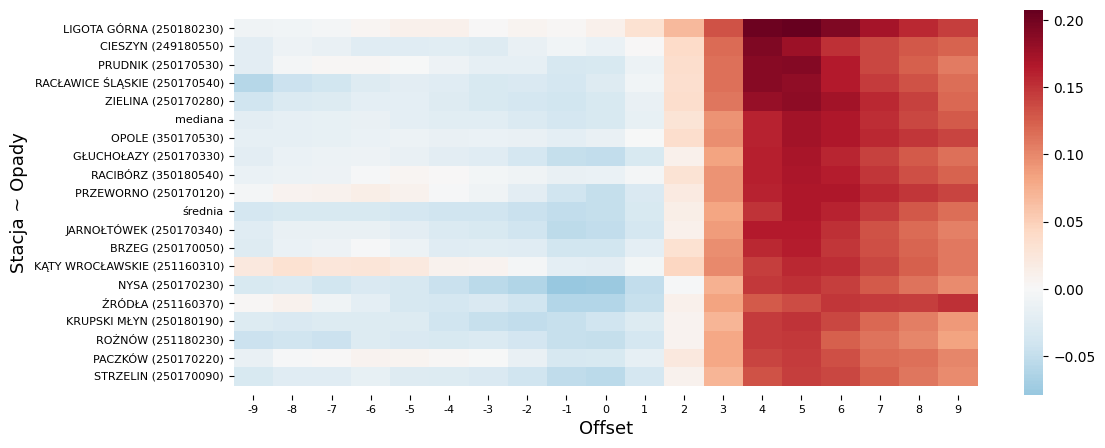

RACIBÓRZ-MIEDONIA


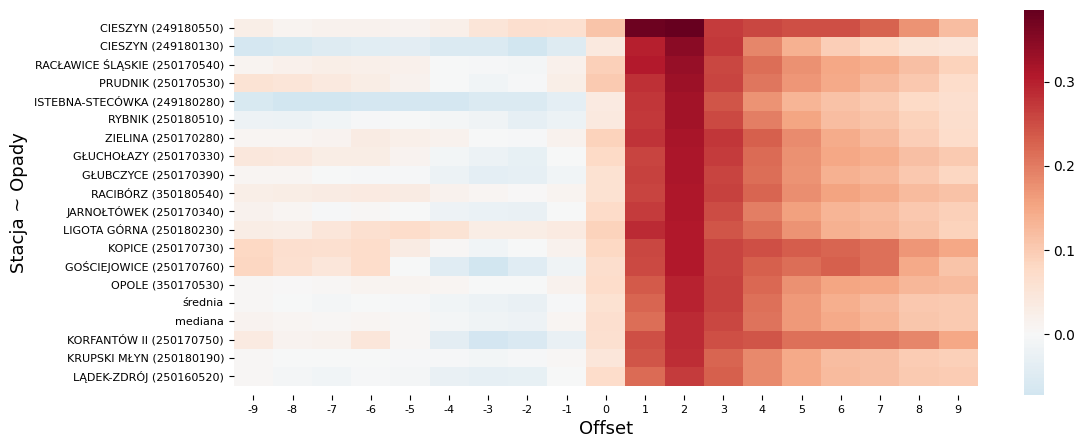

In [24]:
for _, stations in hierarchy.iterrows():
    first_station_name = stations["name_hydro"]
    print(first_station_name)
    # Plot
    plt.figure(figsize=(12, 5))
    ax = sns.heatmap(tlcc_city_rain[f'{first_station_name}_pivot'][:20], 
                     cmap='RdBu_r', 
                     yticklabels=tlcc_city_rain[f'{first_station_name}_pivot'].index[:20],
                     center=0)
    
    ax.set_ylabel('Stacja ~ Opady', size=13)
    ax.set_xlabel('Offset', size=13)

    # Decorations
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.savefig(f'../results/TLCC-{first_station_name}-opady.png', format='png', dpi=600,
                transparent=True,
                bbox_inches = "tight")
    plt.show()

Windowed Time Lagged Cross Correlations 

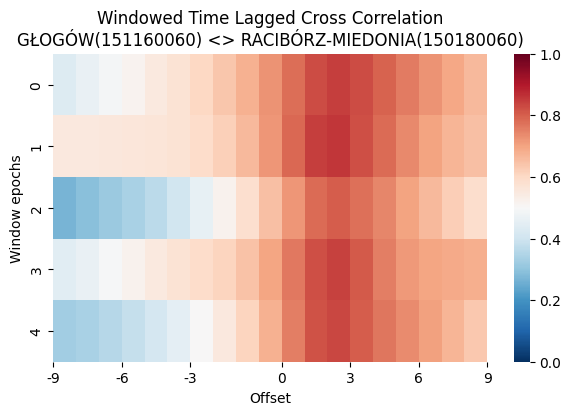

In [25]:
for i, (first_station, second_station) in enumerate(combinations(hydro_stations, 2)):
        first_water_level_col = create_col_name(hierarchy.loc[first_station, "id_hydro"], 
                                                hierarchy.loc[first_station, "name_hydro"],
                                                water_level_suffix)
        first_station_name = hierarchy.loc[first_station, "name_hydro"] + f'({hierarchy.loc[first_station, "id_hydro"]})'
        second_water_level_col = create_col_name(hierarchy.loc[second_station, "id_hydro"], 
                                                 hierarchy.loc[second_station, "name_hydro"],
                                                 water_level_suffix)
        second_station_name = hierarchy.loc[second_station, "name_hydro"] + f'({hierarchy.loc[second_station, "id_hydro"]})'
        if (first_station_name == 'GŁOGÓW(151160060)') & (i < time_lagged_cross_correlation_to_show):
            # Windowed time lagged cross correlation
            no_splits = 5
            samples_per_split = dataset_normalized.shape[0]/no_splits
            rss=[]
            for t in range(0, no_splits):
                d1 = dataset_normalized[first_water_level_col].loc[(t)*samples_per_split:(t+1)*samples_per_split].copy()
                d2 = dataset_normalized[second_water_level_col].loc[(t)*samples_per_split:(t+1)*samples_per_split].copy()
                rs = [crosscorr(d1,d2, lag) for lag in range(-int(9),int(9+1))]
                rss.append(rs)
            rss = pd.DataFrame(rss)
            f,ax = plt.subplots(figsize=(7, 4))
            sns.heatmap(rss,cmap='RdBu_r',ax=ax, vmin=0, vmax=1)
            ax.set(title=f'Windowed Time Lagged Cross Correlation\n{first_station_name} <> {second_station_name}',
                   xlim=[0,10], xlabel='Offset',ylabel='Window epochs')
            ax.set_xticks([0, 3, 6, 10, 13, 16, 19])
            ax.set_xticklabels([-9, -6, -3, 0, 3, 6, 9])
            plt.show()